In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 1000

In [2]:
data = pd.read_csv('sales-data.csv',parse_dates=['barr_date'])
data = data[(data.region_name=="EMEA") & (data.business_area_name=="F00 - GCCT")]
data.rename(columns={"barr_date":"date","revenue": "sales"}, inplace=True)
display(data.head())

data = data[['date','sales']]
data.reset_index(drop=True, inplace=True)
data.head()

,business_area_name,region_name,date,sales
51,F00 - GCCT,EMEA,2017-01-01,1306566.94
74,F00 - GCCT,EMEA,2017-02-01,1528843.56
99,F00 - GCCT,EMEA,2017-03-01,1424717.01
129,F00 - GCCT,EMEA,2017-04-01,956845.84
164,F00 - GCCT,EMEA,2017-05-01,1366084.17


,date,sales
0,2017-01-01,1306566.94
1,2017-02-01,1528843.56
2,2017-03-01,1424717.01
3,2017-04-01,956845.84
4,2017-05-01,1366084.17


In [3]:
data.shape

(60, 2)

<AxesSubplot:xlabel='Date', ylabel='Values'>

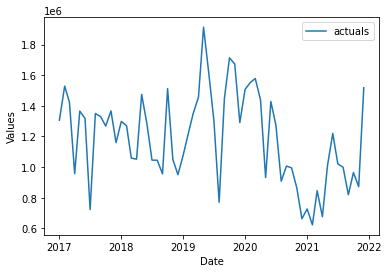

In [4]:
f = Forecaster(y=data['sales'],current_dates=data['date'])
f.plot()

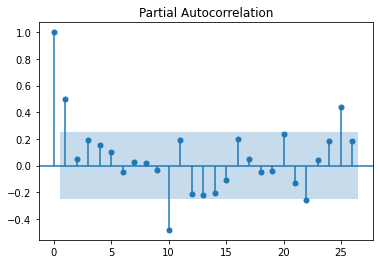

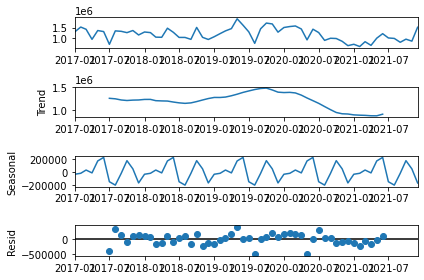

In [5]:
f.plot_pacf(lags=26)
plt.show()

f.seasonal_decompose().plot()
plt.show()

In [6]:
f.set_test_length(12)
f.generate_future_dates(12)
f.set_estimator('lstm')

Epoch 1/200
2/2 [==============================] - 42s 8s/step - loss: 0.5518 - val_loss: 0.3954
Epoch 2/200
2/2 [==============================] - 0s 175ms/step - loss: 0.5321 - val_loss: 0.3553
Epoch 3/200
2/2 [==============================] - 0s 186ms/step - loss: 0.4890 - val_loss: 0.2587
Epoch 4/200
2/2 [==============================] - 0s 168ms/step - loss: 0.3963 - val_loss: 0.2457
Epoch 5/200
2/2 [==============================] - 0s 162ms/step - loss: 0.2829 - val_loss: 0.4474
Epoch 6/200
2/2 [==============================] - 0s 162ms/step - loss: 0.3278 - val_loss: 0.2484
Epoch 7/200
2/2 [==============================] - 0s 168ms/step - loss: 0.2184 - val_loss: 0.1630
Epoch 8/200
2/2 [==============================] - 0s 170ms/step - loss: 0.2314 - val_loss: 0.1543
Epoch 9/200
2/2 [==============================] - 0s 174ms/step - loss: 0.2357 - val_loss: 0.1728
Epoch 10/200
2/2 [==============================] - 0s 171ms/step - loss: 0.2149 - val_loss: 0.2313
Epoch 11/20

2/2 [==============================] - 0s 156ms/step - loss: 0.1912 - val_loss: 0.2204
Epoch 84/200
2/2 [==============================] - 0s 159ms/step - loss: 0.1915 - val_loss: 0.2237
Epoch 85/200
2/2 [==============================] - 0s 161ms/step - loss: 0.1910 - val_loss: 0.2313
Epoch 86/200
2/2 [==============================] - 0s 162ms/step - loss: 0.1914 - val_loss: 0.2225
Epoch 87/200
2/2 [==============================] - 0s 160ms/step - loss: 0.1903 - val_loss: 0.2090
Epoch 88/200
2/2 [==============================] - 0s 162ms/step - loss: 0.1908 - val_loss: 0.2041
Epoch 89/200
2/2 [==============================] - 0s 165ms/step - loss: 0.1917 - val_loss: 0.2068
Epoch 90/200
2/2 [==============================] - 0s 164ms/step - loss: 0.1916 - val_loss: 0.2150
Epoch 91/200
2/2 [==============================] - 0s 159ms/step - loss: 0.1915 - val_loss: 0.2169
Epoch 92/200
2/2 [==============================] - 0s 160ms/step - loss: 0.1919 - val_loss: 0.2114
Epoch 93/200


2/2 [==============================] - 0s 163ms/step - loss: 0.1957 - val_loss: 0.2347
Epoch 165/200
2/2 [==============================] - 0s 160ms/step - loss: 0.1929 - val_loss: 0.2152
Epoch 166/200
2/2 [==============================] - 0s 161ms/step - loss: 0.1912 - val_loss: 0.2046
Epoch 167/200
2/2 [==============================] - 0s 169ms/step - loss: 0.1943 - val_loss: 0.2118
Epoch 168/200
2/2 [==============================] - 0s 160ms/step - loss: 0.1937 - val_loss: 0.2315
Epoch 169/200
2/2 [==============================] - 0s 161ms/step - loss: 0.1947 - val_loss: 0.2368
Epoch 170/200
2/2 [==============================] - 0s 163ms/step - loss: 0.1952 - val_loss: 0.2234
Epoch 171/200
2/2 [==============================] - 0s 162ms/step - loss: 0.1935 - val_loss: 0.2135
Epoch 172/200
2/2 [==============================] - 0s 164ms/step - loss: 0.1944 - val_loss: 0.2149
Epoch 173/200
2/2 [==============================] - 0s 161ms/step - loss: 0.1936 - val_loss: 0.2217
Epoc

Epoch 46/200
2/2 [==============================] - 0s 174ms/step - loss: 0.2353 - val_loss: 0.2023
Epoch 47/200
2/2 [==============================] - 0s 178ms/step - loss: 0.2306 - val_loss: 0.1970
Epoch 48/200
2/2 [==============================] - 0s 178ms/step - loss: 0.2318 - val_loss: 0.1945
Epoch 49/200
2/2 [==============================] - 0s 176ms/step - loss: 0.2314 - val_loss: 0.1940
Epoch 50/200
2/2 [==============================] - 0s 178ms/step - loss: 0.2309 - val_loss: 0.1960
Epoch 51/200
2/2 [==============================] - 0s 178ms/step - loss: 0.2309 - val_loss: 0.2024
Epoch 52/200
2/2 [==============================] - 0s 178ms/step - loss: 0.2310 - val_loss: 0.2031
Epoch 53/200
2/2 [==============================] - 0s 182ms/step - loss: 0.2310 - val_loss: 0.2026
Epoch 54/200
2/2 [==============================] - 0s 178ms/step - loss: 0.2310 - val_loss: 0.2002
Epoch 55/200
2/2 [==============================] - 0s 177ms/step - loss: 0.2318 - val_loss: 0.2002


2/2 [==============================] - 0s 178ms/step - loss: 0.2314 - val_loss: 0.1972
Epoch 128/200
2/2 [==============================] - 0s 180ms/step - loss: 0.2305 - val_loss: 0.1960
Epoch 129/200
2/2 [==============================] - 0s 172ms/step - loss: 0.2308 - val_loss: 0.1946
Epoch 130/200
2/2 [==============================] - 0s 176ms/step - loss: 0.2312 - val_loss: 0.1938
Epoch 131/200
2/2 [==============================] - 0s 180ms/step - loss: 0.2307 - val_loss: 0.1964
Epoch 132/200
2/2 [==============================] - 0s 171ms/step - loss: 0.2347 - val_loss: 0.2052
Epoch 133/200
2/2 [==============================] - 0s 174ms/step - loss: 0.2322 - val_loss: 0.2024
Epoch 134/200
2/2 [==============================] - 0s 180ms/step - loss: 0.2314 - val_loss: 0.2015
Epoch 135/200
2/2 [==============================] - 0s 171ms/step - loss: 0.2318 - val_loss: 0.2010
Epoch 136/200
2/2 [==============================] - 0s 180ms/step - loss: 0.2319 - val_loss: 0.2052
Epoc

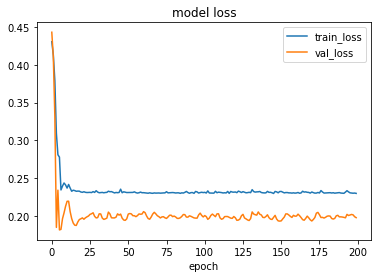

In [7]:
f.manual_forecast(call_me='lstm',
                  lags=12,
                  batch_size=16,
                  epochs=200,
                  validation_split=.20,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(100,)*15,
                  dropout=(0,)*15,
                  plot_loss=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

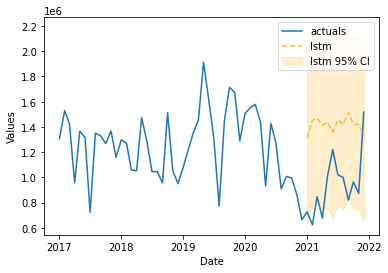

In [8]:
f.plot_test_set(ci=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

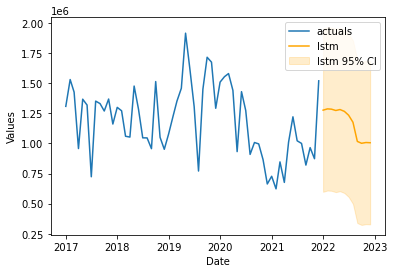

In [9]:
f.generate_future_dates(12)
f.add_time_trend()
f.export(to_excel=True,excel_name='results.xlsx')
f.plot(ci=True)

In [10]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,lstm,0.62,544309.35,-4.29,True


In [11]:
test_2021 = f.export_test_set_preds_with_cis('lstm')
display(test_2021.head(12))

predicted_2022 = f.export_forecasts_with_cis('lstm')
display(predicted_2022.head(12))

,DATE,UpperPreds,Preds,Actuals,LowerPreds,ModelNickname,CILevel
0,2021-01-01,1988406.34,1311657.59,727015.56,634908.84,lstm,0.95
1,2021-02-01,2131343.99,1454595.24,622710.97,777846.49,lstm,0.95
2,2021-03-01,2145240.25,1468491.50,846171.21,791742.75,lstm,0.95
3,2021-04-01,2089792.08,1413043.33,676182.93,736294.58,lstm,0.95
4,2021-05-01,2111903.76,1435155.01,1010042.86,758406.26,lstm,0.95
5,2021-06-01,2035299.13,1358550.38,1219983.79,681801.63,lstm,0.95
6,2021-07-01,2132011.85,1455263.10,1021023.56,778514.35,lstm,0.95
7,2021-08-01,2097057.19,1420308.44,999312.49,743559.69,lstm,0.95
8,2021-09-01,2190465.03,1513716.28,819727.68,836967.53,lstm,0.95
9,2021-10-01,2098717.53,1421968.78,964558.17,745220.03,lstm,0.95


,DATE,UpperForecast,Forecast,LowerForecast,ModelNickname,CILevel
0,2022-01-01,1951915.87,1275167.12,598418.37,lstm,0.95
1,2022-02-01,1962457.71,1285708.96,608960.21,lstm,0.95
2,2022-03-01,1960239.21,1283490.46,606741.71,lstm,0.95
3,2022-04-01,1949162.70,1272413.95,595665.20,lstm,0.95
4,2022-05-01,1956926.68,1280177.93,603429.18,lstm,0.95
5,2022-06-01,1941878.77,1265130.02,588381.27,lstm,0.95
6,2022-07-01,1909965.07,1233216.32,556467.57,lstm,0.95
7,2022-08-01,1851509.51,1174760.76,498012.01,lstm,0.95
8,2022-09-01,1692678.56,1015929.82,339181.07,lstm,0.95
9,2022-10-01,1677272.36,1000523.61,323774.86,lstm,0.95


In [12]:
Total_2021 = test_2021['Actuals'].sum()
Total_2022 = predicted_2022['Forecast'].sum()

Yoy_growth = (Total_2022 - Total_2021)/ Total_2021 * 100

print(f'Total_2021:{Total_2021}')
print(f'Total_2022:{Total_2022}')
print(f'YOY (growth):{Yoy_growth}')

Total_2021:11297510.945131
Total_2022:14098419.105144368
YOY (growth):24.792258875575627
